<a href="https://colab.research.google.com/github/ichhitsapkota143/Machine-Learning/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised learning K-Means, DBSCAN, Hierarchical Clustering**

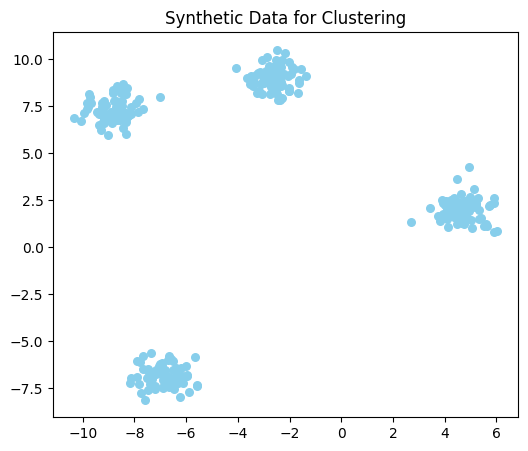

In [ ]:
# 📊 Data Generation Block
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Visualize the data
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], s=30, color='skyblue')
plt.title("Synthetic Data for Clustering")
plt.show()

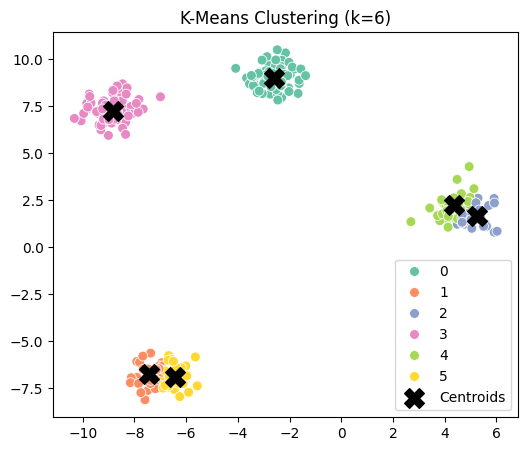

Silhouette Score for k=6: 0.585


In [ ]:
# 🔢 K-Means Clustering Block
import random
k = random.randint(3, 6)  # Pick random k

kmeans = KMeans(n_clusters=k, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plotting the clusters
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_kmeans, palette='Set2', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='X', s=200, label='Centroids')
plt.title(f"K-Means Clustering (k={k})")
plt.legend()
plt.show()

print(f"Silhouette Score for k={k}: {silhouette_score(X, y_kmeans):.3f}")


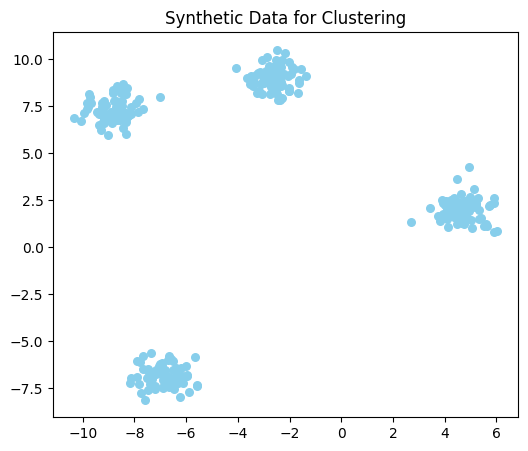

K	Inertia		Silhouette Score
----------------------------------------
2	9051.82		0.6155
3	1773.74		0.7993
4	203.89		0.8756
5	185.21		0.7311
6	166.74		0.5853
7	148.26		0.4517
8	130.90		0.3296
9	117.92		0.3379
10	104.54		0.3592


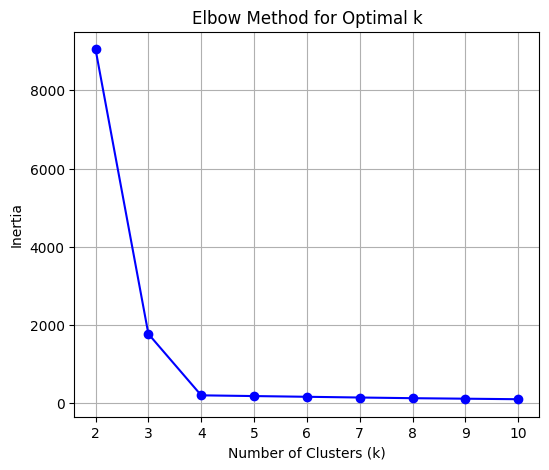

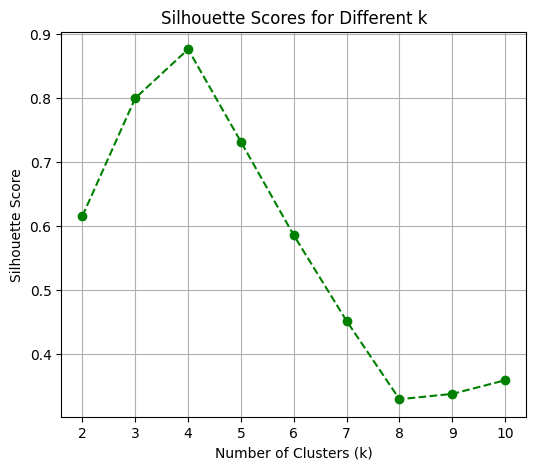


✅ Best k based on Silhouette Score: 4 with score 0.8756


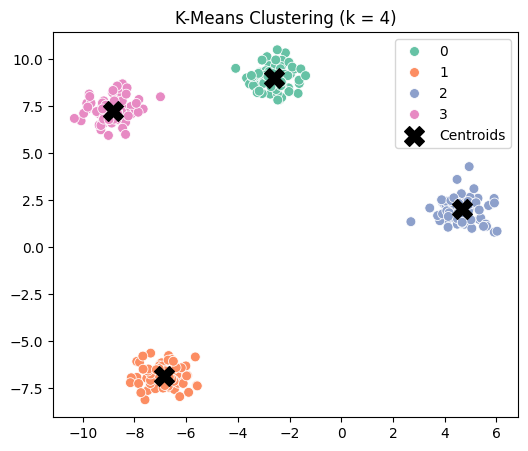

✅ Final Silhouette Score using k=4: 0.8756


In [ ]:
# 📊 1. Generate Synthetic Data
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

# Create synthetic dataset
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Visualize the data
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], s=30, color='skyblue')
plt.title("Synthetic Data for Clustering")
plt.show()

# 🔍 2. Elbow Method + Silhouette Score to Find Optimal k
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
k_range = range(2, 11)

print("K\tInertia\t\tSilhouette Score")
print("-" * 40)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_val = kmeans.inertia_
    silhouette_val = silhouette_score(X, kmeans.labels_)
    inertia.append(inertia_val)
    silhouette_scores.append(silhouette_val)
    print(f"{k}\t{inertia_val:.2f}\t\t{silhouette_val:.4f}")

# Plot Elbow Curve
plt.figure(figsize=(6, 5))
plt.plot(k_range, inertia, 'bo-', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(6, 5))
plt.plot(k_range, silhouette_scores, 'go--', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.grid(True)
plt.show()

# Select best k based on silhouette score
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\n✅ Best k based on Silhouette Score: {best_k} with score {max(silhouette_scores):.4f}")


# 🤖 3. Final K-Means Clustering using best_k
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
y_kmeans_final = kmeans_final.fit_predict(X)

# Plot clusters with centroids
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_kmeans_final, palette='Set2', s=50)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1],
            color='black', marker='X', s=200, label='Centroids')
plt.title(f"K-Means Clustering (k = {best_k})")
plt.legend()
plt.show()

# Print final silhouette score
final_score = silhouette_score(X, y_kmeans_final)
print(f"✅ Final Silhouette Score using k={best_k}: {final_score:.4f}")


# **DBSCAN**

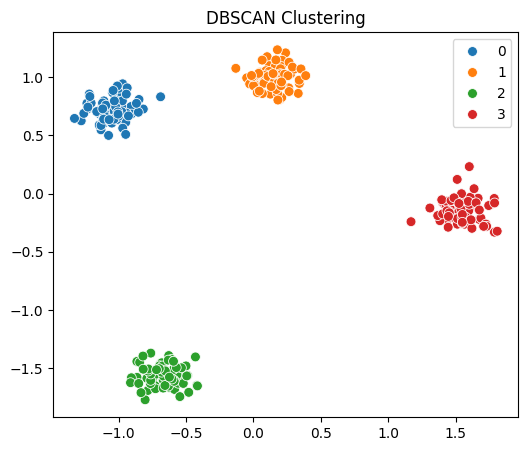

Silhouette Score: Cannot be calculated (only one cluster or all noise).


In [ ]:
# 🧠 DBSCAN Clustering Block
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

# Plotting DBSCAN results
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_dbscan, palette='tab10', s=50)
plt.title("DBSCAN Clustering")
plt.show()

# Filter out noise points (-1)
labels = dbscan.labels_
if len(set(labels)) > 1 and -1 in labels:
    mask = labels != -1
    score = silhouette_score(X_scaled[mask], labels[mask])
    print(f"Silhouette Score (excluding noise): {score:.3f}")
else:
    print("Silhouette Score: Cannot be calculated (only one cluster or all noise).")

# **Heirarchical Clustering**

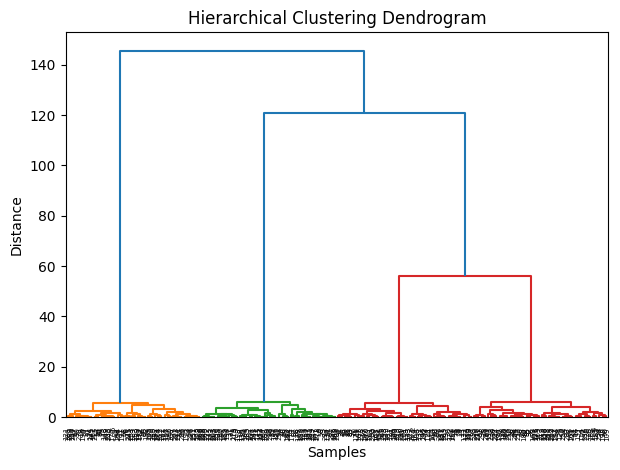

In [ ]:
# 🌳 Hierarchical Clustering Block
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Dendrogram
plt.figure(figsize=(7, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


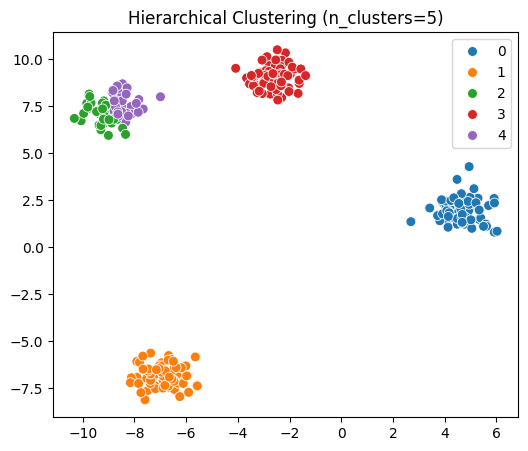

Silhouette Score: 0.7407


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Choose number of clusters randomly
n_clusters = random.randint(3, 5)

# Create model using updated parameter name
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
y_hierarchical = hierarchical.fit_predict(X)

# Plot the results
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_hierarchical, palette='tab10', s=50)
plt.title(f"Hierarchical Clustering (n_clusters={n_clusters})")
plt.show()

# Evaluate clustering quality
from sklearn.metrics import silhouette_score
print(f"Silhouette Score: {silhouette_score(X, y_hierarchical):.4f}")
